In [1]:
%load_ext jbmagics
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2

Exception reporting mode: Minimal


# Large System

In [2]:
import numpy as np
from tools.make_model import make_input, run_simulation
from tools.plotting import show_heads, show_well_head
from tools.base_model import make_model_data

In [3]:
model_path = r'models\mf6'
name = 'sysinoutwel_d100'
pattern = np.array([0.1, 1., 0.1])
wel_1_qout = pattern * -25
wel_2_qout = pattern * -35
wel_1_out_coords = (0, 20, 60)
wel_2_out_coords = (0, 70, 60)
wel_1_in_coords = (0, 20, 20)
wel_2_in_coords =(0, 70, 20)

specific_model_data = {
    'model_path': model_path,
    'name': name,
    'nrow': 100, 
    'ncol': 100,
    'top': 10.0,
    'chd': [
        [(0, 0, 0), 5],
        [(0, 99, 99), 7]
    ],
    'wells': {
        'wel_1_out': {'q': wel_1_qout, 'coords': wel_1_out_coords},
        'wel_2_out': {'q': wel_2_qout, 'coords': wel_2_out_coords},
        'wel_1_in': {'q': -wel_1_qout, 'coords': wel_1_in_coords},
        'wel_2_in': {'q': -wel_2_qout, 'coords': wel_2_in_coords},
             }
}
model_data = make_model_data(specific_model_data)

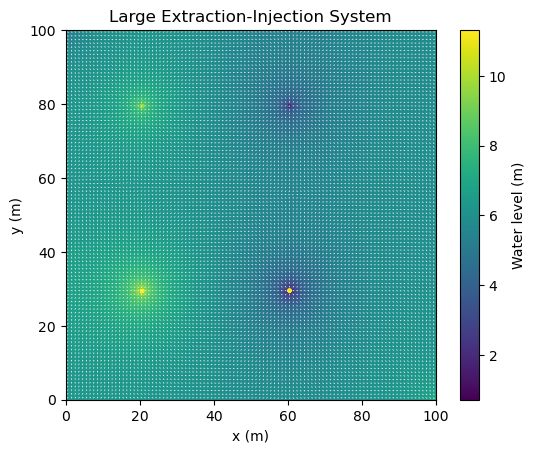

In [4]:
make_input(model_data)
run_simulation(model_path=model_path)
show_heads(model_path=model_path, name=name, title='Large Extraction-Injection System', show_grid=False);

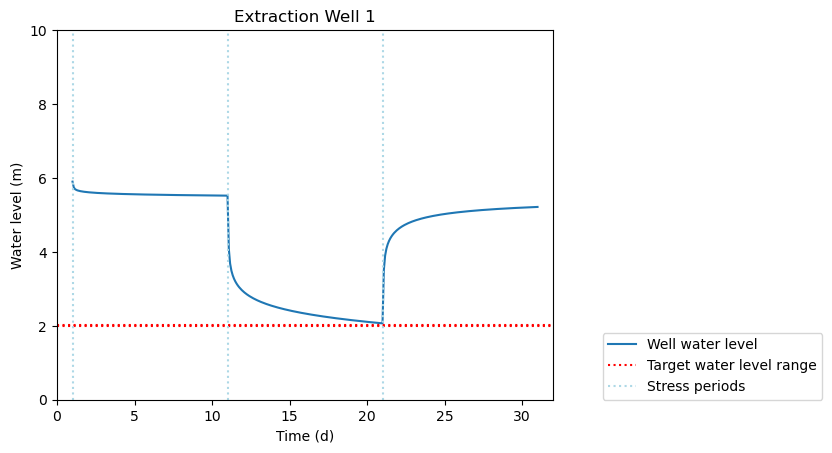

In [5]:
show_well_head(
    title='Extraction Well 1',
    wel_coords=wel_1_out_coords, 
    model_data=model_data,
    y_start=0,
    y_end=10,
    lower_head_limit=1.99,
    upper_head_limit=2.01,
);

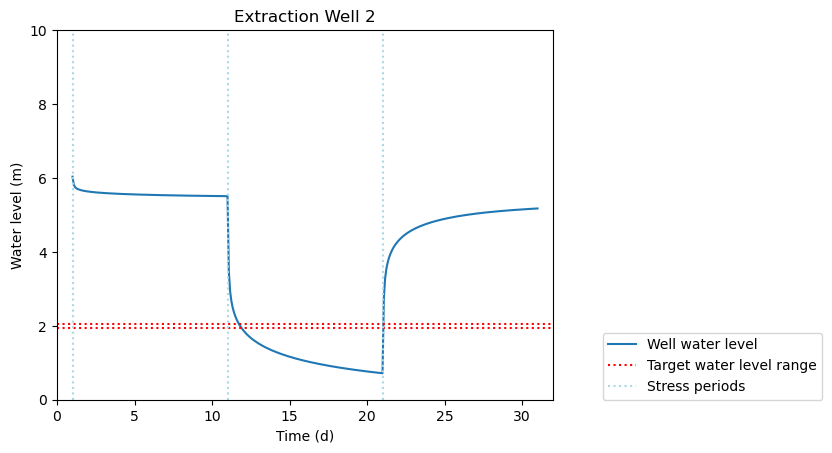

In [6]:
show_well_head(
    title='Extraction Well 2',
    wel_coords=wel_2_out_coords, 
    model_data=model_data,
    y_start=0,
    y_end=10,
    lower_head_limit=1.95,
    upper_head_limit=2.05,
);

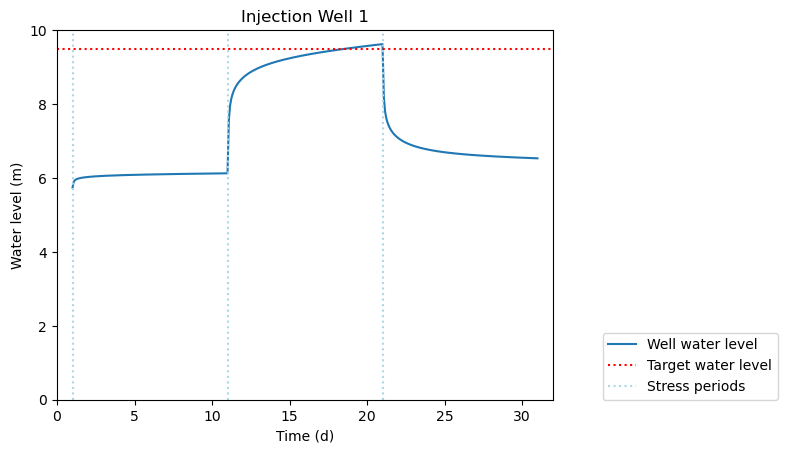

In [7]:
show_well_head(
    title='Injection Well 1',
    wel_coords=wel_1_in_coords, 
    model_data=model_data,
    y_start=0,
    y_end=10,
    upper_head_limit=9.5,
);

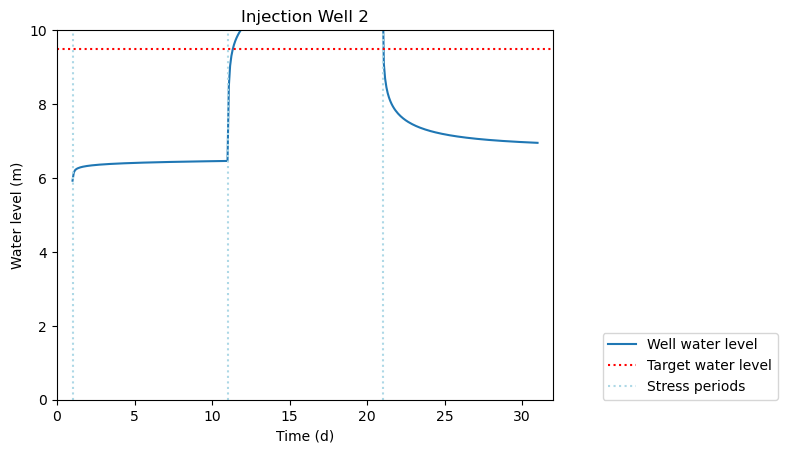

In [8]:
show_well_head(
    title='Injection Well 2',
    wel_coords=wel_2_in_coords, 
    model_data=model_data,
    y_start=0,
    y_end=10,
    upper_head_limit=9.5,
);

In [9]:
pymf6_model_data = model_data | {'model_path': r'models\pymf6'}

make_input(pymf6_model_data)

In [10]:
import sys
from subprocess import run

NORMAL TERMINATION OF SIMULATION


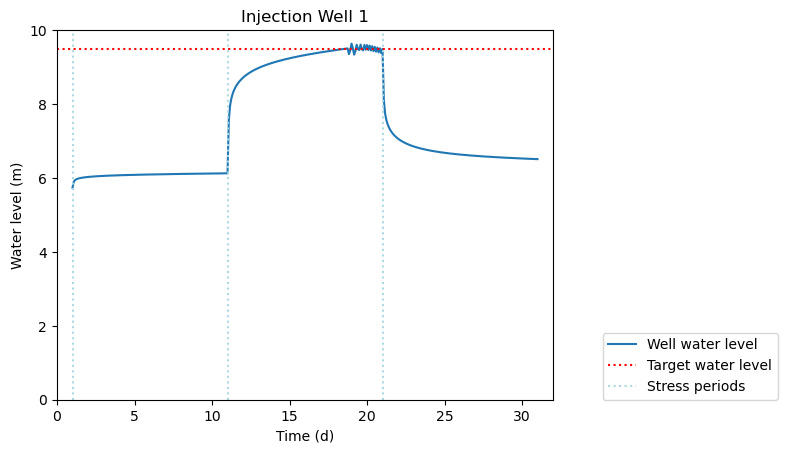

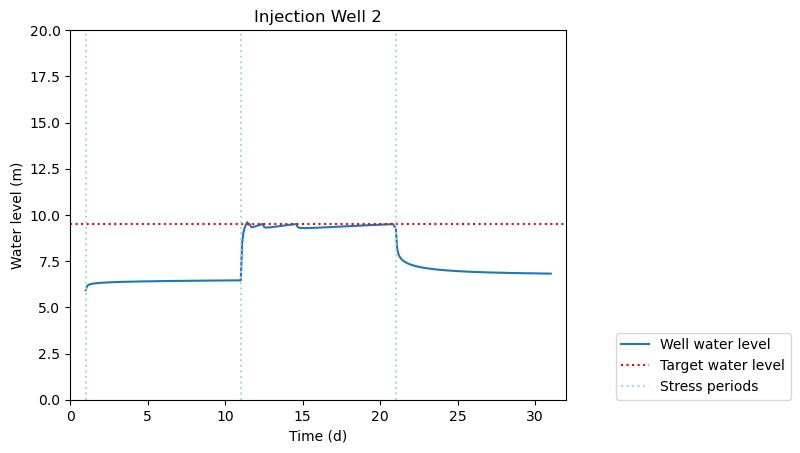

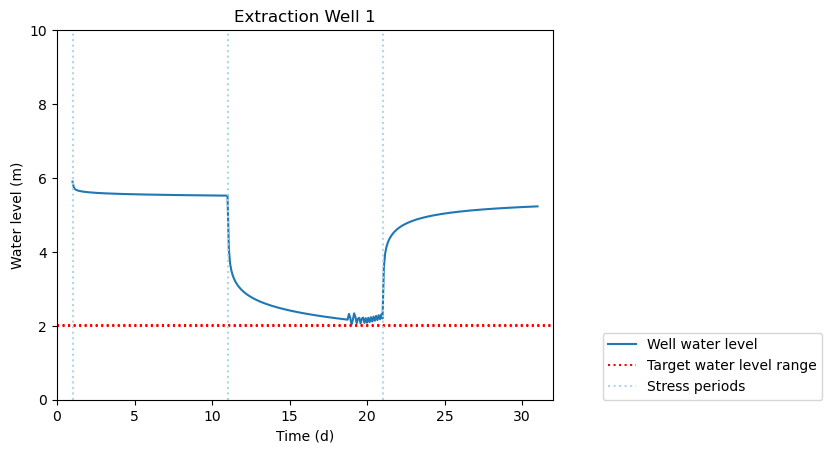

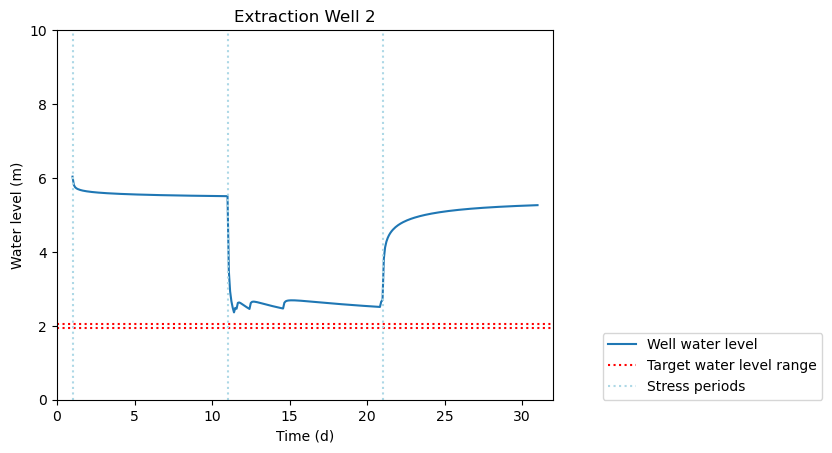

In [11]:
run([sys.executable, 'large_4_well.py'], check=True)
show_well_head(
    title='Injection Well 1',
    wel_coords=wel_1_in_coords, 
    model_data=pymf6_model_data,
    y_start=0,
    y_end=10,
    upper_head_limit=9.5,
);

show_well_head(
    title='Injection Well 2',
    wel_coords=wel_2_in_coords, 
    model_data=pymf6_model_data,
    y_start=0,
    y_end=20,
    upper_head_limit=9.5,
);
show_well_head(
    title='Extraction Well 1',
    wel_coords=wel_1_out_coords, 
    model_data=pymf6_model_data,
    y_start=0,
    y_end=10,
    lower_head_limit=1.99,
    upper_head_limit=2.01,
);

show_well_head(
    title='Extraction Well 2',
    wel_coords=wel_2_out_coords, 
    model_data=pymf6_model_data,
    y_start=0,
    y_end=10,
    lower_head_limit=1.95,
    upper_head_limit=2.05,
);